In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Pandas**

In [2]:
df=pd.read_csv("smartphone_usage_365_days.csv")
df.head()

,day,screen_time_hours,notifications,social_media_hours,gaming_hours,call_duration_hours,battery_usage_percent
0,1,2.55,215,1.07,0.47,0.68,28
1,2,2.19,166,1.53,0.41,1.13,22
2,3,2.97,183,1.47,0.50,0.49,37
3,4,3.81,107,2.45,0.43,0.98,57
4,5,2.55,93,1.22,0.30,0.48,34


In [3]:
df.tail()

,day,screen_time_hours,notifications,social_media_hours,gaming_hours,call_duration_hours,battery_usage_percent
360,361,1.00,210,0.53,0.36,0.54,26
361,362,1.18,183,0.73,0.30,0.63,21
362,363,1.00,227,0.50,0.30,0.98,20
363,364,1.00,59,0.50,0.30,1.30,20
364,365,1.00,54,0.51,0.30,0.92,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    365 non-null    int64  
 1   screen_time_hours      365 non-null    float64
 2   notifications          365 non-null    int64  
 3   social_media_hours     365 non-null    float64
 4   gaming_hours           365 non-null    float64
 5   call_duration_hours    365 non-null    float64
 6   battery_usage_percent  365 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.1 KB


In [5]:
df.describe

<bound method NDFrame.describe of      day  screen_time_hours  notifications  social_media_hours  gaming_hours  \
0      1               2.55            215                1.07          0.47   
1      2               2.19            166                1.53          0.41   
2      3               2.97            183                1.47          0.50   
3      4               3.81            107                2.45          0.43   
4      5               2.55             93                1.22          0.30   
..   ...                ...            ...                 ...           ...   
360  361               1.00            210                0.53          0.36   
361  362               1.18            183                0.73          0.30   
362  363               1.00            227                0.50          0.30   
363  364               1.00             59                0.50          0.30   
364  365               1.00             54                0.51          0.30   

     

In [6]:
df.shape

(365, 7)

In [7]:
df.columns

Index(['day', 'screen_time_hours', 'notifications', 'social_media_hours',
       'gaming_hours', 'call_duration_hours', 'battery_usage_percent'],
      dtype='object')

In [8]:
df.dtypes

day                        int64
screen_time_hours        float64
notifications              int64
social_media_hours       float64
gaming_hours             float64
call_duration_hours      float64
battery_usage_percent      int64
dtype: object

In [9]:
print(df.isnull().sum())
print(df.duplicated().sum())

day                      0
screen_time_hours        0
notifications            0
social_media_hours       0
gaming_hours             0
call_duration_hours      0
battery_usage_percent    0
dtype: int64
0


In [10]:
df.columns

Index(['day', 'screen_time_hours', 'notifications', 'social_media_hours',
       'gaming_hours', 'call_duration_hours', 'battery_usage_percent'],
      dtype='object')

In [11]:
avg_screen_time=df['screen_time_hours'].mean()
print("Average screen time :",avg_screen_time)

high_gaming=df['gaming_hours'].max()
print("Highest Gaming hours : ",high_gaming)

total_notification=df['notifications'].sum()
print("Total notification : ",total_notification)

Average screen time : 2.577671232876712
Highest Gaming hours :  2.19
Total notification :  52874


---

# **Extra**

In [12]:
avg_screen=df['screen_time_hours'].mean()

df['usage_type']=df['screen_time_hours'].apply(
    lambda x: 'High Use' if x>avg_screen else 'Normal Use'
)
df['usage_type'].value_counts()

usage_type
Normal Use    198
High Use      167
Name: count, dtype: int64

In [13]:
df[['screen_time_hours', 'notifications', 'battery_usage_percent']].corr()


,screen_time_hours,notifications,battery_usage_percent
screen_time_hours,1.000000,0.086522,0.956526
notifications,0.086522,1.000000,0.053525
battery_usage_percent,0.956526,0.053525,1.000000


In [14]:
df.loc[df['screen_time_hours'].idxmax()]


day                           285
screen_time_hours            6.69
notifications                 132
social_media_hours           3.17
gaming_hours                 2.12
call_duration_hours          1.27
battery_usage_percent         100
usage_type               High Use
Name: 284, dtype: object

In [15]:
df.sort_values(
    by='screen_time_hours',
    ascending=False
).head(5)


,day,screen_time_hours,notifications,social_media_hours,gaming_hours,call_duration_hours,battery_usage_percent,usage_type
284,285,6.69,132,3.17,2.12,1.27,100,High Use
156,157,6.49,79,4.11,1.89,0.78,100,High Use
31,32,6.48,123,4.30,0.76,0.73,98,High Use
282,283,6.27,217,3.80,1.72,0.89,98,High Use
167,168,6.08,66,2.93,2.19,1.13,97,High Use


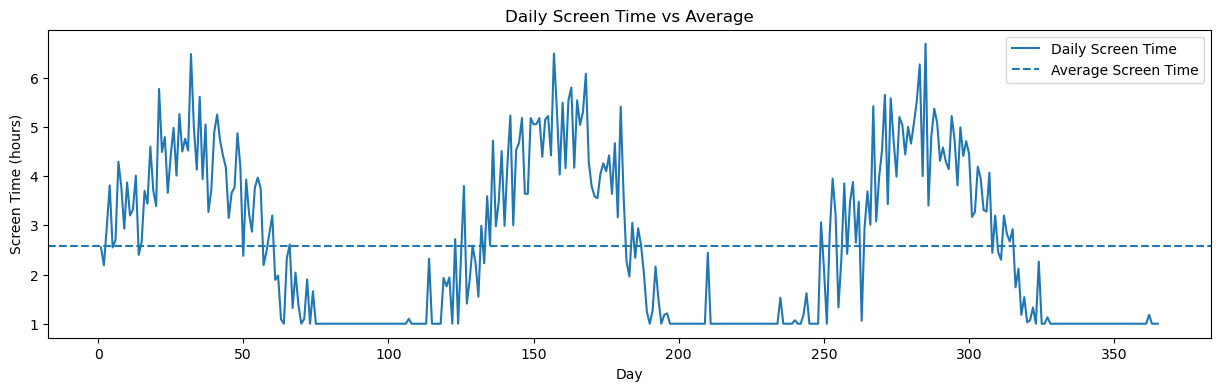

In [16]:
avg = df['screen_time_hours'].mean()

plt.figure(figsize=(15,4))
plt.plot(df['day'], df['screen_time_hours'], label='Daily Screen Time')
plt.axhline(avg, linestyle='--', label='Average Screen Time')

plt.xlabel("Day")
plt.ylabel("Screen Time (hours)")
plt.title("Daily Screen Time vs Average")
plt.legend()
plt.show()


---

#  **Matplotlib**

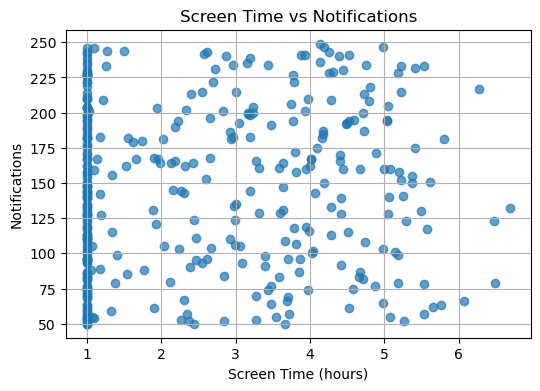

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(
    df['screen_time_hours'],
    df['notifications'],
    alpha=0.7
)
plt.xlabel("Screen Time (hours)")
plt.ylabel("Notifications")
plt.title("Screen Time vs Notifications")
plt.grid(True)
plt.show()

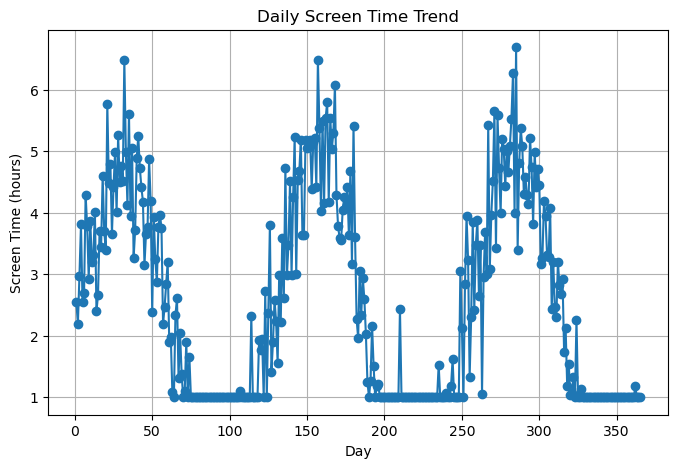

In [18]:
plt.figure(figsize=(8,5))
plt.plot(df['day'], df['screen_time_hours'], marker='o')

plt.xlabel("Day")
plt.ylabel("Screen Time (hours)")
plt.title("Daily Screen Time Trend")
plt.grid(True)
plt.show()


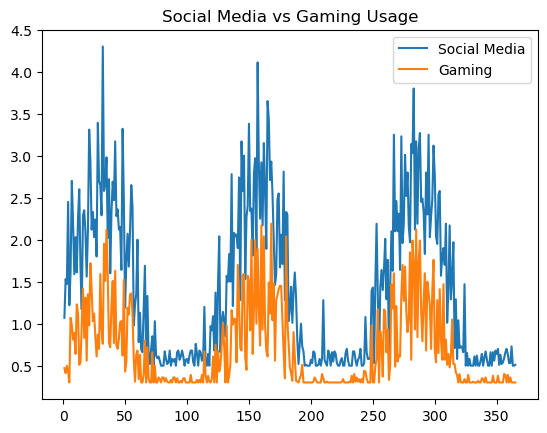

In [19]:
plt.plot(df['day'], df['social_media_hours'], label='Social Media')
plt.plot(df['day'], df['gaming_hours'], label='Gaming')
plt.legend()
plt.title("Social Media vs Gaming Usage")
plt.show()


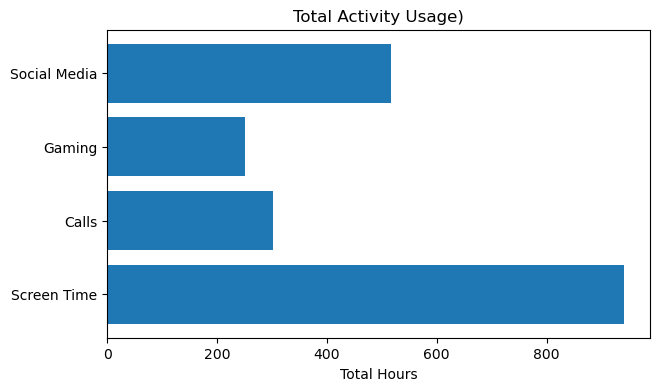

In [20]:
activities=[
    "Screen Time",
    "Calls",
    "Gaming",
    "Social Media"
]
totals=[
    df["screen_time_hours"].sum(),
    df["call_duration_hours"].sum(),
    df["gaming_hours"].sum(),
    df["social_media_hours"].sum()
]

plt.figure(figsize=(7,4))
plt.barh(activities,totals)
plt.xlabel("Total Hours")
plt.title("Total Activity Usage)")
plt.show()

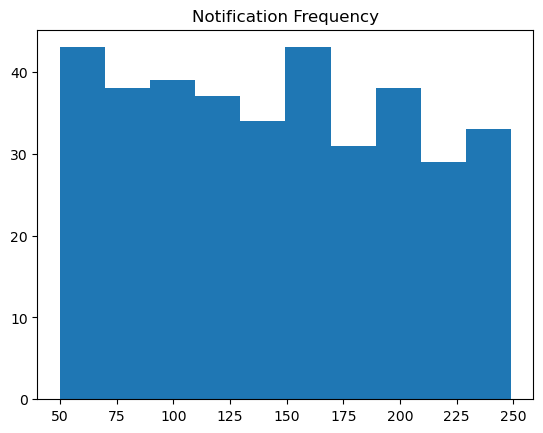

In [27]:
plt.hist(df['notifications'])
plt.title("Notification Frequency")
plt.show()

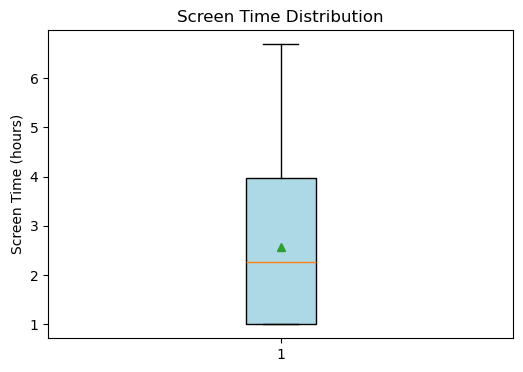

In [53]:
plt.figure(figsize=(6,4))
plt.boxplot(
    df['screen_time_hours'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    showmeans=True
)
plt.ylabel("Screen Time (hours)")
plt.title("Screen Time Distribution")
plt.show()

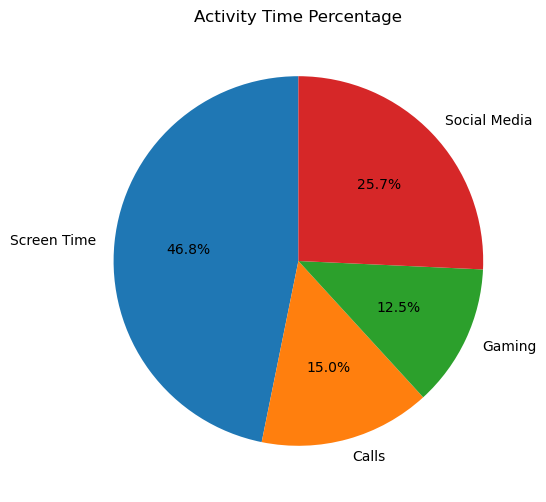

In [54]:
activities=[
    "Screen Time",
    "Calls",
    "Gaming",
    "Social Media"
]
values=[
    df["screen_time_hours"].sum(),
    df["call_duration_hours"].sum(),
    df["gaming_hours"].sum(),
    df["social_media_hours"].sum()
]
plt.figure(figsize=(6,6))
plt.pie(
    totals,
    labels=activities,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Activity Time Percentage")
plt.show()

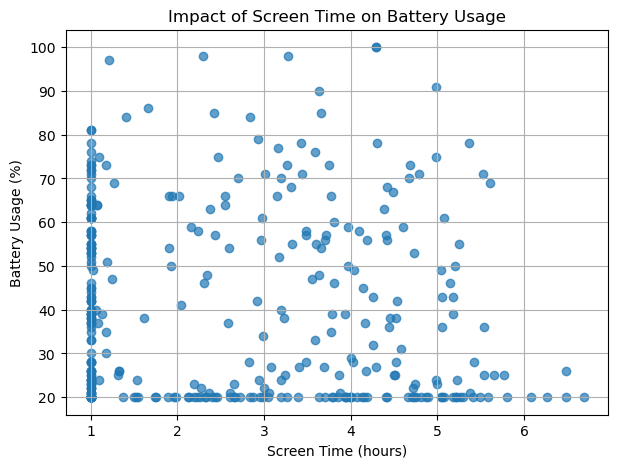

In [44]:
plt.figure(figsize=(7,5))
plt.scatter(df['screen_time_hours'], df['battery_usage_percent'], alpha=0.7)

plt.xlabel("Screen Time (hours)")
plt.ylabel("Battery Usage (%)")
plt.title("Impact of Screen Time on Battery Usage")
plt.grid(True)
plt.show()


# **Numpy**

In [35]:
random_days=np.random.choice(df['day'], size=5)
print("Random Days:",random_days)

Random Days: [323  35 341 315  27]


In [38]:
vals=df['screen_time_hours'].values
np.random.shuffle(vals)

print("Shuffled Screen Time:", vals)


Shuffled Screen Time: [1.   3.   1.   1.   2.99 1.   5.61 4.14 1.   1.   5.25 1.03 2.98 1.
 1.   4.42 1.   3.01 1.   1.   3.43 3.44 1.   1.   1.   3.16 4.6  3.77
 1.9  5.53 1.   2.3  1.27 1.18 3.64 3.55 1.   1.   4.39 2.93 1.07 1.
 3.31 1.   1.06 1.   1.   1.   1.   3.2  4.19 3.97 4.17 3.81 1.   1.
 4.53 1.   1.   4.42 3.59 2.4  2.83 3.4  2.37 1.   1.32 2.58 3.2  4.66
 1.   5.06 1.33 4.51 5.22 5.22 4.98 4.87 1.   4.81 4.41 5.58 1.   5.41
 3.24 1.5  1.   2.66 2.96 1.   5.26 3.48 1.   3.27 1.98 2.99 1.   1.
 1.   3.95 1.   3.79 1.   5.08 1.   1.   1.   1.   1.   2.46 1.   5.
 2.87 1.   1.   5.04 1.   5.05 4.44 5.54 4.72 2.61 1.13 1.   5.05 3.72
 1.   3.95 1.62 4.52 6.48 1.   3.78 3.17 1.   2.55 1.   1.   3.66 3.77
 1.   3.15 5.15 1.   3.32 1.66 3.81 2.92 1.   4.79 3.59 1.   3.71 2.84
 1.41 4.67 4.29 1.   1.   4.99 1.   5.37 3.66 4.04 1.   2.42 3.75 1.21
 2.24 1.   3.97 2.16 2.44 1.1  1.   1.   1.93 1.   2.04 1.94 1.   1.
 1.   1.   4.   1.   2.31 5.38 1.   1.   2.72 1.   2.94 2.61 5.42 1

In [39]:
bonus_hours=np.random.randint(1,6,size=10)
print("Bonus Hours:",bonus_hours)

Bonus Hours: [5 3 4 1 4 1 1 2 3 5]


In [41]:
arr=np.arange(12)
print("Array is :",arr)

arr_2d=arr.reshape(3,4)
print("2D Array:",arr_2d)

arr_flatt=arr.flatten()
print("Flatten Array:",arr_flatt)

Array is : [ 0  1  2  3  4  5  6  7  8  9 10 11]
2D Array: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Flatten Array: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [1]:
item=("pen","pencil","book")
a,b,c=item
print(b)

pencil
